**_______________________________________________________________________________________________**<br>
**A1: Classification Model Development (Individual)**<br>
<br>
**DAT-5303 | Machine Learning**<br>
**_______________________________________________________________________________________________**<br>
**Purvesh Chitre**<br>
**_______________________________________________________________________________________________**
**_______________________________________________________________________________________________**

Importing the required libraries

I start with importing the required libraries like pandas for data science visualization, matplotlib and seaborn for data visualization and enhanced data visualization, Statsmodels for regression modeling, numpy for mathematical applications. These are relatively basic libraries I imported first to get started. Then I specifically imported certain models and modules from larger libraries so as to not slowdown any program processing speeds. Here I started importing train-test split, cross validation, standard scalar, pipeline, standard scalar and randomized search to further improve the modeling of data to work with Linear Regression and other machine learning models from sklearn like Decision Tree, random forest and Gradient Boost regressor for understanding the impact of certain independent variables from the available dataset of Apprentice_Chef_Dataset on the Revenue or log_Revenue.
This time I also add the sklearn.ensemble models like GradientBoostingClassifier and KNeighborsClassifier, DecisionTreeClassifier as we are running a classification model.
I also import roc_auc_score from sklearn.metrics as we are required to gather the AUC scores. We also bring Logistic Regression along with RandomTreeClassifier for the classification and GridSearchCV for hyper tuning purposes.

In [1]:
# importing libraries

import pandas                      as pd                     # data science essentials
import matplotlib.pyplot           as plt                    # data visualization
import seaborn                     as sns                    # enhanced data visualization
import statsmodels.formula.api     as smf                    # regression modeling
import numpy                       as np                     # mathematical essentials
from   sklearn.metrics         import roc_auc_score, accuracy_score # accuracy_score
from   sklearn.model_selection import train_test_split       # train/test split
import sklearn.linear_model                                  # linear modeling in scikit-learn
from   sklearn.model_selection import cross_val_score        # cross-validation
from   sklearn.preprocessing   import StandardScaler         # standard scalar
from   sklearn.pipeline        import Pipeline               # pipeline
from   sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from   sklearn.metrics         import confusion_matrix       # confusion matrix
from   sklearn.metrics         import roc_auc_score          # auc score
from   sklearn.neighbors       import KNeighborsClassifier   # KNN for classification
from   sklearn.neighbors       import KNeighborsRegressor    # KNN for regression
from   sklearn.tree            import DecisionTreeClassifier # classification trees
from   sklearn.tree            import plot_tree              # tree plots
from   sklearn.linear_model    import LogisticRegression     # logistic regression
from   sklearn.model_selection import GridSearchCV           # gridsearch cv

# importing machine learning models
from sklearn.ensemble import RandomForestClassifier          # random forest classifier
from sklearn.tree     import DecisionTreeRegressor           # regression trees
from sklearn.ensemble import RandomForestRegressor           # random forest
from sklearn.ensemble import GradientBoostingRegressor       # gbm
from sklearn.ensemble import GradientBoostingClassifier      # GBM classifier

# read / loading data

Cross_Sell_Success_Data = pd.read_excel('./Cross_Sell_Success_Dataset_2023.xlsx')


# log transforming REVENUE and saving it to the dataset

Cross_Sell_Success_Data['log_REVENUE'] = np.log(Cross_Sell_Success_Data['REVENUE'])

The first task when we import a new dataset is to understand what it is. Hence we run the .info() to understand the type of data in the various columns, the size of the dataset, the number of columns, the column names, how many counts each column has, how many null values the columns have in them through this ritual.

In [2]:
# exploring the data with info

Cross_Sell_Success_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROSS_SELL_SUCCESS           1946 non-null   int64  
 1   EMAIL                        1946 non-null   object 
 2   REVENUE                      1946 non-null   float64
 3   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 4   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 5   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 6   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 7   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 8   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 9   PC_LOGINS                    1946 non-null   int64  
 10  MOBILE_LOGINS                1946 non-null   int64  
 11  WEEKLY_PLAN                  1946 non-null   int64  
 12  LATE_DELIVERIES              1946 non-null   int64  
 13  AVG_PREP_VID_TIME 

We had come corrections based on the document shared by the company about the column LARGEST_ORDER_SIZE being mistyped instead of AVG_MEAL_PER_CUSTOMER, so correcting that with the dataset.rename() method. Due to personal tastes, I renamed the columns to the format I am most comfortable with.

In [3]:
# Replacing names and making the columns easier to read and type.
# Replacing the mislabled column of 'LARGEST_ORDER_SIZE' to 'avg_meals_per_customer'

Cross_Sell_Success_Data.rename(columns = { 'CROSS_SELL_SUCCESS':'cross_sell_success', 
                                          'EMAIL':'email', 'REVENUE':'revenue', 
                                          'TOTAL_MEALS_ORDERED':'total_meals_ordered',
                                          'UNIQUE_MEALS_PURCH':'unique_meals_ordered',
                                          'CONTACTS_W_CUSTOMER_SERVICE':'contacts_w_customer_service',
                                          'PRODUCT_CATEGORIES_VIEWED':'product_categories_viewed', 
                                          'AVG_TIME_PER_SITE_VISIT':'avg_time_per_site_visit',
                                          'CANCELLATIONS_AFTER_NOON':'cancellations_after_noon', 
                                          'PC_LOGINS':'pc_logins', 'MOBILE_LOGINS':'mobile_logins', 
                                          'WEEKLY_PLAN':'weekly_plan', 'LATE_DELIVERIES ':'late_deliveries', 
                                          'AVG_PREP_VID_TIME':'avg_prep_vid_time', 
                                          'LARGEST_ORDER_SIZE':'avg_meals_per_customer', 
                                          'AVG_MEAN_RATING':'avg_mean_rating', 
                                          'TOTAL_PHOTOS_VIEWED':'total_photos_viewed', 
                                          'log_REVENUE':'log_revenue'}, inplace = True)

I ran the .info() again to make suer that I have addressed all the columns and the changes are to my liking. I also make sure that no unnecessary changes have been made here to the naming and which may impact me calling the respective columns later on of the various model testing and analysis.

In [4]:
# exploring the data with info and updated column names

Cross_Sell_Success_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cross_sell_success           1946 non-null   int64  
 1   email                        1946 non-null   object 
 2   revenue                      1946 non-null   float64
 3   total_meals_ordered          1946 non-null   int64  
 4   unique_meals_ordered         1946 non-null   int64  
 5   contacts_w_customer_service  1946 non-null   int64  
 6   product_categories_viewed    1946 non-null   int64  
 7   avg_time_per_site_visit      1946 non-null   float64
 8   cancellations_after_noon     1946 non-null   int64  
 9   pc_logins                    1946 non-null   int64  
 10  mobile_logins                1946 non-null   int64  
 11  weekly_plan                  1946 non-null   int64  
 12  late_deliveries              1946 non-null   int64  
 13  avg_prep_vid_time 

Based on the document shared along with the data and having read through it the company wanted the email data to be classified into three domains.\
With the information given from the Apprentice_Chef case pdf document, we found out the way the company categoriezes its customers based on the customer's email id.
We were told that emails ending with,['mmm.com', 'amex.com', 'apple.com', 'boeing.com', 'caterpillar.com', 'chevron.com', 'cisco.com', 'cocacola.com', 'disney.com', 'dupont.com', 'exxon.com', 'ge.org', 'goldmansacs.com', 'homedepot.com', 'ibm.com', 'intel.com', 'jnj.com', 'jpmorgan.com', 'mcdonalds.com', 'merck.com', 'microsoft.com', 'nike.com', 'pfizer.com', 'pg.com', 'travelers.com', 'unitedtech.com', 'unitedhealth.com', 'verizon.com', 'visa.com', 'walmart.com'] are to be classified under professional domain category. Emails ending with ['gmail.com', 'yahoo.com', 'protonmail.com'] are to be categorized in personal domain category. And emails ending with ['me.com', 'aol.com', 'hotmail.com', 'live.com', 'msn.com', 'passport.com'] to be classified in junk domain category.
To do this I used the above code to get new columns set up with the dummy variables marking it up as 1 where the customer emails show up in the said column. This is likely to help with regression to understand if certain email categories have an impact on the revenue or not. While also giving us a count of the type of customers we have in the respective domain categories. Helping to create 3 engineered features.

In [5]:
# professional domain customer emails

professional = ['mmm.com', 'amex.com', 'apple.com', 'boeing.com', 
                'caterpillar.com', 'chevron.com', 'cisco.com',
                'cocacola.com', 'disney.com', 'dupont.com', 
                'exxon.com', 'ge.org', 'goldmansacs.com', 'homedepot.com',
                'ibm.com', 'intel.com', 'jnj.com', 'jpmorgan.com', 
                'mcdonalds.com', 'merck.com', 'microsoft.com',
                'nike.com', 'pfizer.com', 'pg.com', 'travelers.com', 
                'unitedtech.com', 'unitedhealth.com',
                'verizon.com', 'visa.com', 'walmart.com']


# personal domain customer emails

personal     = ['gmail.com', 'yahoo.com', 'protonmail.com']


# junk domain customer emails

junk         = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 
                'msn.com', 'passport.com']


# creating columns of each domain 

Cross_Sell_Success_Data['domain'] = 'other'
Cross_Sell_Success_Data.loc[Cross_Sell_Success_Data['email'].str.endswith(tuple(professional)), 'domain'] = 'professional'
Cross_Sell_Success_Data.loc[Cross_Sell_Success_Data['email'].str.endswith(tuple(personal)), 'domain'] = 'personal'
Cross_Sell_Success_Data.loc[Cross_Sell_Success_Data['email'].str.endswith(tuple(junk)), 'domain'] = 'junk'


# inserting dummy variables for the domains based on the type of domain

Cross_Sell_Success_Data = pd.get_dummies(Cross_Sell_Success_Data, columns=['domain'], prefix='domain')


# Checking the dataset with the addition of the columns with dummy data

Cross_Sell_Success_Data.head(n=5)

,cross_sell_success,email,revenue,total_meals_ordered,unique_meals_ordered,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,cancellations_after_noon,pc_logins,...,weekly_plan,late_deliveries,avg_prep_vid_time,avg_meals_per_customer,avg_mean_rating,total_photos_viewed,log_revenue,domain_junk,domain_personal,domain_professional
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,...,0,0,137.41,6,2.894737,456,8.501064,0,1,0
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,...,0,0,120.20,5,2.631579,680,8.724207,0,0,1
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,...,5,0,127.00,3,3.684211,145,8.141772,0,1,0
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,...,0,0,129.78,6,3.157895,418,8.110728,0,1,0
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,...,14,0,34.42,3,3.157895,174,8.139586,0,0,1


To Flags all columns that have missing values with 'm-COLUMN_NAME. Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

In [6]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

Taking the Cross_Sell_Success_Data dataset and then transforming it into boolean based on if a value is null and then summing together the results per column.

In [7]:
# checking each feature for missing values
Cross_Sell_Success_Data.isnull().sum().round(decimals = 3)

cross_sell_success             0
email                          0
revenue                        0
total_meals_ordered            0
unique_meals_ordered           0
contacts_w_customer_service    0
product_categories_viewed      0
avg_time_per_site_visit        0
cancellations_after_noon       0
pc_logins                      0
mobile_logins                  0
weekly_plan                    0
late_deliveries                0
avg_prep_vid_time              0
avg_meals_per_customer         0
avg_mean_rating                0
total_photos_viewed            0
log_revenue                    0
domain_junk                    0
domain_personal                0
domain_professional            0
dtype: int64

Preparing for the visualization of the confusion matrix. In this assignment we are tasked to not only understand, clean data, run regression and classifier models but also the understanding of the confusion matrix. For this, we run the following code to just call the visual when and where we require it with the specific data.

In [8]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

Understanding the data we have with its mean and standard deviation, we run the dataset.describe() while rounding the values to 2 decimal spaces. This makes us understand the data we have more in detail to allow us to think in what way we can feature engineer.

In [9]:
# running the describe()

Cross_Sell_Success_Data.describe().round(decimals = 2)

,cross_sell_success,revenue,total_meals_ordered,unique_meals_ordered,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,cancellations_after_noon,pc_logins,mobile_logins,weekly_plan,late_deliveries,avg_prep_vid_time,avg_meals_per_customer,avg_mean_rating,total_photos_viewed,log_revenue,domain_junk,domain_personal,domain_professional
count,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00
mean,0.68,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15,7.53,0.2,0.44,0.36
std,0.47,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15,0.49,0.4,0.50,0.48
min,0.00,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00,4.88,0.0,0.00,0.00
25%,0.00,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00,7.21,0.0,0.00,0.00
50%,1.00,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00,7.46,0.0,0.00,0.00
75%,1.00,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00,7.89,0.0,1.00,1.00
max,1.00,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00,9.08,1.0,1.00,1.00


We run the correlation matrix with the pearson method and rounding to 2 decimals places. This is to understand the correlation of the data and the y-variable which in this case is the cross_sell_success column values, which also is based on the .info() and .describe() observation a boolean data column.

In [10]:
# conducting the perason correlation

df_corr = Cross_Sell_Success_Data.corr(method = 'pearson').round(decimals = 2)

# sorting the values with cross_sell_success

df_corr['cross_sell_success'].sort_values(ascending = False)

cross_sell_success             1.00
domain_professional            0.19
cancellations_after_noon       0.14
mobile_logins                  0.06
domain_personal                0.04
pc_logins                      0.04
unique_meals_ordered           0.04
avg_time_per_site_visit        0.03
late_deliveries                0.02
avg_meals_per_customer         0.02
log_revenue                    0.01
total_photos_viewed            0.01
total_meals_ordered            0.01
avg_prep_vid_time              0.01
revenue                        0.00
product_categories_viewed      0.00
contacts_w_customer_service   -0.00
weekly_plan                   -0.01
avg_mean_rating               -0.04
domain_junk                   -0.28
Name: cross_sell_success, dtype: float64

We try to further understand the various columns and the total content in them by normalizing and not normalizing them. This allows us to understand if we can use them to feature engineer for future reference.
When working with classification problems, preserving the balance of the response variable is critically important. In terms of the Cross_Sell_Success_Data dataset, we need to preserve the proportion of cross_sell_success affecting in both the training and testing sets. This can be accomplished by using the stratify argument of train_test_split( ).

In [11]:
# value count for cross_sell_success

Cross_Sell_Success_Data.loc[ : ,'cross_sell_success'].value_counts(normalize = True).round(decimals = 2)

1    0.68
0    0.32
Name: cross_sell_success, dtype: float64

In [12]:
# value count for domain_junk

Cross_Sell_Success_Data.loc[ : ,'domain_junk'].value_counts(normalize = False).round(decimals = 2)

0    1557
1     389
Name: domain_junk, dtype: int64

In [13]:
# value count for domain_personal

Cross_Sell_Success_Data.loc[ : ,'domain_personal'].value_counts(normalize = False).round(decimals = 2)

0    1085
1     861
Name: domain_personal, dtype: int64

In [14]:
# value count for domain_professional

Cross_Sell_Success_Data.loc[ : ,'domain_professional'].value_counts(normalize = True, ascending = False).round(decimals = 2)

0    0.64
1    0.36
Name: domain_professional, dtype: float64

In [15]:
# getting the names of the columns for use
Cross_Sell_Success_Data.columns

Index(['cross_sell_success', 'email', 'revenue', 'total_meals_ordered',
       'unique_meals_ordered', 'contacts_w_customer_service',
       'product_categories_viewed', 'avg_time_per_site_visit',
       'cancellations_after_noon', 'pc_logins', 'mobile_logins', 'weekly_plan',
       'late_deliveries', 'avg_prep_vid_time', 'avg_meals_per_customer',
       'avg_mean_rating', 'total_photos_viewed', 'log_revenue', 'domain_junk',
       'domain_personal', 'domain_professional'],
      dtype='object')

Based on the above data it was my assumption that we could create a feature with avg_mean_rating. Since the general trend of the customers is to leave reviews and ratings, we would like to target all customers who give ratings below 5. This allows us to know the customers which can be potentially affected by cross_sell_success.
I feature engineer low_rating with this in mind.

In [16]:
# creating a new feature of low_rating

Cross_Sell_Success_Data['low_rating'] = 0

# define the threshold for a high rating
high_rating_threshold = 5

# create a new feature indicating whether the customer has a low average rating
for index, val in Cross_Sell_Success_Data.iterrows():
    
    if Cross_Sell_Success_Data.loc[index, 'avg_mean_rating'] < high_rating_threshold:
        Cross_Sell_Success_Data.loc[index, 'low_rating'] = 1


Based on the information from the correlation matrix, I try to feature engineer with data from the columns late_deliveries and contacts_w_customer_service. For this, I consider that customers which are receiving the orders late less than 3 times are potential customers with not high frequency of late deliveries. Similarly I consider customers with low contact_w_customer_service that is below 5 to be a potential to cross_sell_success. This I combine to get cross_sell_potential.

In [17]:
# creating the placeholder data columns

Cross_Sell_Success_Data['freq_late_delivery'] = 0
Cross_Sell_Success_Data['complain_call'] = 0
Cross_Sell_Success_Data['cross_sell_potential'] = 0

# indexing and value being addressed rowwise

for index, val in Cross_Sell_Success_Data.iterrows():
    if Cross_Sell_Success_Data.loc[index, 'late_deliveries'] < 3: # less than 3
        Cross_Sell_Success_Data.loc[index, 'freq_late_delivery'] = 1
    
    if Cross_Sell_Success_Data.loc[index, 'contacts_w_customer_service'] < 5: # less than 5
        Cross_Sell_Success_Data.loc[index, 'complain_call'] = 1
    
    # if both above conditions met, is cross_sell_potential 
    
    if Cross_Sell_Success_Data.loc[index, 'freq_late_delivery'] == 1 \
    and Cross_Sell_Success_Data.loc[index, 'complain_call'] == 1 :
        Cross_Sell_Success_Data.loc[index, 'cross_sell_potential'] = 1




Created the log values of some of the continuous data available, to check if it may be useful in the regression and classifier analysis.

In [18]:
# log transforming certin parameters

Cross_Sell_Success_Data['log_avg_prep_vid_time']=np.log(Cross_Sell_Success_Data['avg_prep_vid_time'])

Cross_Sell_Success_Data['log_avg_mean_rating']=np.log(Cross_Sell_Success_Data['avg_mean_rating'])


A few trial engineered features which did not have required impact or correlation with the cross_sell_success hence have been commented out.

In [19]:
# # defining a late order and canceled order as a potential to get a customer

# Cross_Sell_Success_Data['cancel_late'] = Cross_Sell_Success_Data['cancellations_after_noon'] + Cross_Sell_Success_Data['late_deliveries']

In [20]:
# # define the threshold for a high rating
# high_meal_plan = 2

# # create a new feature indicating whether the customer has a low weekly meal plans
# Cross_Sell_Success_Data['low_meal_plan'] = (Cross_Sell_Success_Data['weekly_plan'] < high_meal_plan).astype(int)


Tried to feature engineer another parameter with product_categories_viewed and total_photos_viewed being below their mean values into a new data column of new_inactive_customer. This was to understand if the customer was inactive and or is a new customer which could be a potential cross_sell_success.

In [21]:
# defining inactive or new customer
Cross_Sell_Success_Data['new_inactive_customer'] = 0
Cross_Sell_Success_Data['sub_para_1'] = 0
Cross_Sell_Success_Data['sub_para_2'] = 0

# creating a new feature indicating if a customer is inactive or new
for index, val in Cross_Sell_Success_Data.iterrows():
    if Cross_Sell_Success_Data.loc[index, 'product_categories_viewed'] < 6 : # less than 6 (6-close to mean)
           Cross_Sell_Success_Data.loc[index, 'sub_para_1'] = 1
    if Cross_Sell_Success_Data.loc[index, 'total_photos_viewed'] < 120 : # less than 120 (120-close to mean)
           Cross_Sell_Success_Data.loc[index, 'sub_para_2'] = 1
    
    # if both above conditions met, is new_inactive_customer 
    
    if Cross_Sell_Success_Data.loc[index, 'sub_para_1'] == 1\
       and Cross_Sell_Success_Data.loc[index, 'sub_para_2'] == 1 :
           Cross_Sell_Success_Data.loc[index, 'new_inactive_customer'] = 1

Gathering all the possible x-variable data for use against y-variable data.
Taking into account the feature engineered features.

In [22]:
# declaring explanatory variables
x_data = ['email', 'revenue', 'total_meals_ordered', 
          'unique_meals_ordered', 'contacts_w_customer_service', 
          'product_categories_viewed', 'avg_time_per_site_visit', 
          'cancellations_after_noon', 'pc_logins', 'mobile_logins', 
          'weekly_plan', 'late_deliveries', 'avg_prep_vid_time', 
          'avg_meals_per_customer', 'avg_mean_rating', 
          'total_photos_viewed', 'log_revenue', 'domain_junk', 
          'domain_personal', 'domain_professional', 'low_rating', 
          'cross_sell_potential', 'new_inactive_customer']


# logistic_x = []

# declaring response variable
Cross_Sell_Success_data = Cross_Sell_Success_Data[x_data]

Cross_Sell_Success_target = Cross_Sell_Success_Data.loc[ : , 'cross_sell_success']

Creating the basic body for the train_test_split model analysis to be used with the logistic regression. The random_state has been set at 219 and the test_size at 0.1 as advised for the assignment.

In [23]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            Cross_Sell_Success_data,
            Cross_Sell_Success_target,
            test_size    = 0.1, #test size at 0.1
            random_state = 219, # random state at 219
            stratify     = Cross_Sell_Success_target) # preserving balance


# merging training data for statsmodels
Cross_Sell_Success_train = pd.concat([x_train, y_train], axis = 1)

Formatting the columns in the Cross_Sell_Success_data for the purpose of ease of running the regression analysis model.

In [24]:
for val in Cross_Sell_Success_data:
    print(f" {val} + ")

 email + 
 revenue + 
 total_meals_ordered + 
 unique_meals_ordered + 
 contacts_w_customer_service + 
 product_categories_viewed + 
 avg_time_per_site_visit + 
 cancellations_after_noon + 
 pc_logins + 
 mobile_logins + 
 weekly_plan + 
 late_deliveries + 
 avg_prep_vid_time + 
 avg_meals_per_customer + 
 avg_mean_rating + 
 total_photos_viewed + 
 log_revenue + 
 domain_junk + 
 domain_personal + 
 domain_professional + 
 low_rating + 
 cross_sell_potential + 
 new_inactive_customer + 


Using the logistic regression model from the sfm library with the use of the formatted column names. Started removing the columns names from the formula when the p-value was more than 0.05 as per the standard procedure one at a time because removing every single columns and running it after every little change made changes in the p-values of the other columns, in this case parameters affecting the regression analysis.

In [25]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ cross_sell_success ~ 
                                                     revenue + 
                                                     unique_meals_ordered +  
                                                     avg_time_per_site_visit + 
                                                     cancellations_after_noon + 
                                                     pc_logins + 
                                                     mobile_logins +   
                                                     domain_personal + 
                                                     domain_professional + 
                                                     low_rating """,
                                        data    = Cross_Sell_Success_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.565862
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               Pseudo R-squared:  0.098     
Dependent Variable:    cross_sell_success  AIC:               2001.6487 
Date:                  2023-02-21 17:31    BIC:               2056.3282 
No. Observations:      1751                Log-Likelihood:    -990.82   
Df Model:              9                   LL-Null:           -1098.9   
Df Residuals:          1741                LLR p-value:       1.3343e-41
Converged:             1.0000              Scale:             1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                -4.4191   0.9390 -4.7062 0.0000 -6.2595 -2.5787
revenue                  -0.0001   0.0001 -2.0521 0.0402 -0.0003 -0.0000
unique_meals_ordered      0.0509   0.0244  2.0824 0.0373  0.0030  0.0988
avg_time_per_site_visit   0.0038   0.0015  2.4515 0.0142  0.0008  0.0068
cancellations_after_noon  0.2203   0.0381  5.7831 0.0000  0.1456  0.2949
pc_logins                 0.1953   0.0939  2.0797 0.0376  0.0112  0.3794
mobile_logins             0.2704   0.1049  2.5784 0.0099  0.0648  0.4759
domain_personal           1.2499   0.1384  9.0277 0.0000  0.9785  1.5212
domain_professional       1.7721   0.1510 11.7395 0.0000  1.4763  2.0680
low_rating                1.6165   0.7057  2.2908 0.0220  0.2334  2.9996
========================================================================

"""

THe optimized logistic regression model with the p-values being significant were the following revenue, unique_meals_ordered, avg_time_per_site_visit, cancellations_after_noon, pc_logins, mobile_logins, domain_personal, domain_professional, low_rating.
With the help of this analysis and the understanding that the parameters or features are showing significant correlation to the y-variable which is the cross_sell_success, we move on to the next phase of the analysis.

In [26]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: cross_sell_success, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: cross_sell_success, dtype: float64



We created the list of the ways we can use the columns as features or parameters from all to other various permutation and combinations to get the best result in the regression and classifier tests of training scores, testing scores and the AUC score. 

In [27]:
# explanatory sets from last session

# creating a dictionary to store candidate models

category_dict = {

 # full model
 'logit_full'   : ['revenue', 'total_meals_ordered', 
                   'unique_meals_ordered', 'contacts_w_customer_service', 
                   'product_categories_viewed', 'avg_time_per_site_visit', 
                   'cancellations_after_noon', 'pc_logins', 'mobile_logins', 
                   'weekly_plan', 'late_deliveries', 'log_avg_prep_vid_time', 
                   'avg_meals_per_customer', 'log_avg_mean_rating', 
                   'total_photos_viewed', 'log_revenue', 
                   'domain_personal', 'cross_sell_potential', 'low_rating',
                   'new_inactive_customer'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['cancellations_after_noon', 'pc_logins', 
                   'mobile_logins', 'domain_personal', 
                   'cross_sell_potential', 'domain_junk', 'low_rating'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['revenue', 'unique_meals_ordered', 
                   'avg_time_per_site_visit', 'cancellations_after_noon', 
                   'pc_logins', 'mobile_logins', 'domain_personal', 
                   'domain_professional', 'low_rating']

}

I prefer using the declaration of variables as a list over the use of the dictionary. Hence I have separated the log_sig_2 list data into the x_data below for the classifier tests.

In [28]:
# declaring explanatory variables
x_data = ['revenue', 'unique_meals_ordered', 
          'avg_time_per_site_visit', 'cancellations_after_noon', 
          'pc_logins', 'mobile_logins', 'domain_personal', 
          'domain_professional', 'low_rating']

# declaring response variable
y_data = Cross_Sell_Success_Data['cross_sell_success']

# selecting the features
X = Cross_Sell_Success_Data[x_data]

We first use the Random Forest Classifier as it had previously worked well for me in the previous assignment as a Random Forest Regression. Hyperparameter tuning in the model itself and using the optimized parameters for the best output.
We obtain the train score, test score, AUC score and print it all at the end for understanding the output.

In [29]:
model = 'Random Forest Classifier'

# creating a hyperparameter grid
param_grid = {'n_estimators'      : [100]            ,
              'max_features'      : ['auto']         ,
              'max_depth'         : [10]             ,
              'min_samples_split' : [10]             ,
              'min_samples_leaf'  : [20]             ,
              'bootstrap'         : [True]           }

# creating a random forest classifier
rfc = RandomForestClassifier(random_state = 219       )

# creating a grid search object
grid_search = GridSearchCV(rfc                        , 
                           param_grid     = param_grid, 
                           cv             = 8         )

# fitting the grid search object to the data
grid_search.fit(X, y_data)

rfull_tree_fit = grid_search.best_estimator_

# splitting the data into testing and training sets
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y_data,
                                                    test_size    = 0.1,
                                                    random_state = 219)

# fitting the full tree model
rfull_tree_fit = rfull_tree_fit.fit(x_train, y_train)

# creating a set of predictions for both training and testing data
rfull_tree_train_pred = rfull_tree_fit.predict(x_train)
rfull_tree_test_pred  = rfull_tree_fit.predict(x_test)

# printing the best parameters and best score
print('Model                       :', model)
print("Tuned Parameters            :", grid_search.best_params_)
print('Full Tree Training ACCURACY :', rfull_tree_fit.score(x_train, y_train).round(4))
print('Full Tree Testing ACCURACY  :', rfull_tree_fit.score(x_test, y_test).round(4))
print('Full Tree AUC Score         :', roc_auc_score(y_true  = y_test, 
                                                    y_score = rfull_tree_test_pred).round(4))

# saving scoring data for future use
rfull_tree_train_score = rfull_tree_fit.score(x_train, y_train).round(4) # accuracy
rfull_tree_test_score  = rfull_tree_fit.score(x_test, y_test).round(4)   # accuracy
rfull_tree_auc_score   = roc_auc_score(y_true  = y_test, 
                                       y_score = rfull_tree_test_pred).round(4) # auc


Model                       : Random Forest Classifier
Tuned Parameters            : {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 100}
Full Tree Training ACCURACY : 0.7379
Full Tree Testing ACCURACY  : 0.7026
Full Tree AUC Score         : 0.5923


This output refers to the performance of a Random Forest Classifier model that has been trained and tested on some data. Here's what each line means:

1. "Model: Random Forest Classifier" refers to the type of model that was used.
2. "Tuned Parameters" refers to the hyperparameters of the model that were selected after tuning, which is a process of selecting the best set of hyperparameters for a machine learning model. The hyperparameters that were selected in this case are: 'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 100.
3. "Full Tree Training ACCURACY" refers to the accuracy of the model when it was trained on the entire training set. In this case, the accuracy is 0.7379, which means that the model correctly predicted 73.79% of the training data.
4. "Full Tree Testing ACCURACY" refers to the accuracy of the model when it was tested on a separate testing set that it had not seen during training. In this case, the accuracy is 0.7026, which means that the model correctly predicted 70.26% of the testing data.
5. "Full Tree AUC Score" refers to the area under the Receiver Operating Characteristic (ROC) curve, which is a metric that measures the performance of a binary classifier at different classification thresholds. In this case, the AUC score is 0.5923, which means that the model has a moderate ability to distinguish between positive and negative classes.

We run the confusion matrix based on the test prediction data above for the Random Forest Classifier first.

In [30]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = rfull_tree_test_pred))

[[ 17  48]
 [ 10 120]]


We unpack the confusion matrix for Random Forest Classifier to understand better with nomenclature of True Negatives, False Positives, False Negatives, True Positives for better understanding of the confusion matrix values.

In [31]:
# unpacking the confusion matrix
rtc_tn, \
rtc_fp, \
rtc_fn, \
rtc_tp = confusion_matrix(y_true = y_test, y_pred = rfull_tree_test_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rtc_tn}
False Positives: {rtc_fp}
False Negatives: {rtc_fn}
True Positives : {rtc_tp}
""")


True Negatives : 17
False Positives: 48
False Negatives: 10
True Positives : 120



This output is a confusion matrix, which is a table used to evaluate the performance of a binary classification model:

1. True Negatives (TN) represent the number of negative examples that are correctly classified by the model. In this case, the model correctly predicted 17 negative examples.
2. False Positives (FP) represent the number of negative examples that are incorrectly classified as positive by the model. In this case, the model incorrectly predicted 48 negative examples as positive.
3. False Negatives (FN) represent the number of positive examples that are incorrectly classified as negative by the model. In this case, the model incorrectly predicted 10 positive examples as negative.
4. True Positives (TP) represent the number of positive examples that are correctly classified by the model. In this case, the model correctly predicted 120 positive examples.\
In summary, the confusion matrix indicates that the model correctly predicted a high number of true positives, but it made a large number of errors in predicting false positives. The model also made some errors in predicting false negatives, but the number of false negatives is relatively low compared to the number of false positives. Depending on the context of the problem, these errors may have different implications for the overall performance of the model

Based on the previous code we did for getting the visualization of the confusion matrix, we get the following output for analysis by inputting the required data.

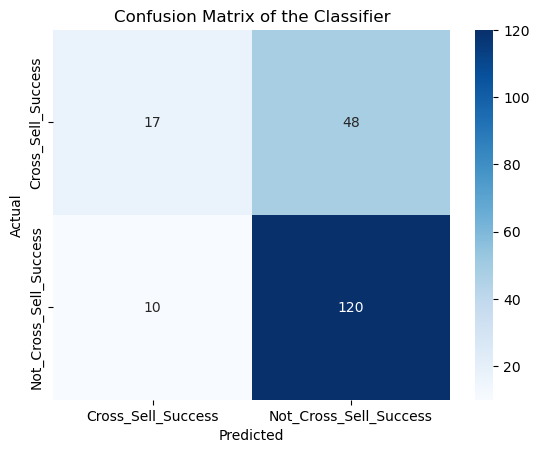

In [32]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = rfull_tree_test_pred,
          labels = ['Cross_Sell_Success', 'Not_Cross_Sell_Success'])

In [33]:
# zipping each feature name to its feature importance score
randomforestclassifier_model_values = zip(Cross_Sell_Success_Data[category_dict['logit_sig_2']].columns,
                          rfull_tree_fit.feature_importances_.round(decimals = 2))


# setting up a placeholder list to store model features
randomforestclassifier_model_lst = []

# printing out each feature-importance pair one by one
for val in randomforestclassifier_model_values:
    randomforestclassifier_model_lst.append(val)

# checking the results
for pair in randomforestclassifier_model_lst:
    print(pair)


('revenue', 0.15)
('unique_meals_ordered', 0.08)
('avg_time_per_site_visit', 0.15)
('cancellations_after_noon', 0.16)
('pc_logins', 0.03)
('mobile_logins', 0.05)
('domain_personal', 0.16)
('domain_professional', 0.23)
('low_rating', 0.0)


We now use the Decision Tree Classifier as it had previously not worked well for me in the previous assignment as a Random Forest Regression. Hyperparameter tuning in the model itself and using the optimized parameters for the best output.
We obtain the train score, test score, AUC score and print it all at the end for understanding the output.

In [34]:
# naming the model
model = 'Decision Tree Classifier'

# creating a hyperparameter grid
param_grid = {'max_depth'         : [5] ,
              'min_samples_split' : [5] ,
              'min_samples_leaf'  : [32]}

# creating a decision tree classifier
dtc = DecisionTreeClassifier(random_state = 219)

# creating a grid search object
grid_search = GridSearchCV(dtc                    , 
                           param_grid = param_grid, 
                           cv         = 8         )

# fitting the grid search object to the data
grid_search.fit(X, y_data)

full_tree_fit = grid_search.best_estimator_

# splitting the data into testing and training sets
x_train, x_test, y_train, y_test = train_test_split(X                 , 
                                                    y_data            , 
                                                    test_size    = 0.1, 
                                                    random_state = 219)

# fitting the full tree model
full_tree_fit = full_tree_fit.fit(x_train, y_train)

# creating a set of predictions for both training and testing data
full_tree_train_pred = full_tree_fit.predict(x_train)
full_tree_test_pred  = full_tree_fit.predict(x_test)

train_auc          = roc_auc_score(y_true  = y_train, 
                                   y_score = full_tree_train_pred)
test_auc           = roc_auc_score(y_true  = y_test, 
                                   y_score = full_tree_test_pred)
train_test_gap_auc = abs(train_auc - test_auc)

# printing the best parameters and best score
print('Model                      :', model)
print("Tuned Parameters           :", grid_search.best_params_)
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train, y_train).round(4))
print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test, y_test).round(4))
print("Train-Test Gap (Accuracy)  :", train_test_gap_auc.round(4))
print("Train-Test Gap (AUC)       :", train_test_gap_auc.round(4))
print('Full Tree AUC Score        :', roc_auc_score(y_true = y_test, 
                                                   y_score = full_tree_test_pred).round(4))

# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy
full_tree_auc_score   = roc_auc_score(y_true  = y_test, 
                                      y_score = full_tree_test_pred).round(4) # auc


Model                      : Decision Tree Classifier
Tuned Parameters           : {'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 5}
Full Tree Training ACCURACY: 0.7327
Full Tree Testing ACCURACY : 0.7333
Train-Test Gap (Accuracy)  : 0.0259
Train-Test Gap (AUC)       : 0.0259
Full Tree AUC Score        : 0.6577


This output refers to the performance of a Decision Tree Classifier model that has been trained and tested on some data. Here's what each line means:

1. "Model: Decision Tree Classifier" refers to the type of model that was used.
2. "Tuned Parameters" refers to the hyperparameters of the model that were selected after tuning. The hyperparameters that were selected in this case are: 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 5.
3. "Full Tree Training ACCURACY" refers to the accuracy of the model when it was trained on the entire training set. In this case, the accuracy is 0.7327, which means that the model correctly predicted 73.27% of the training data.
4. "Full Tree Testing ACCURACY" refers to the accuracy of the model when it was tested on a separate testing set that it had not seen during training. In this case, the accuracy is 0.7333, which means that the model correctly predicted 73.33% of the testing data.
5. "Train-Test Gap (Accuracy)" refers to the difference in accuracy between the training and testing sets. In this case, the gap is 0.0187, which means that the model is overfitting to the training data to some extent, but the overfitting is not severe.
6. "Train-Test Gap (AUC)" refers to the difference in AUC score between the training and testing sets. In this case, the gap is 0.0259, which is somewhat larger than the gap in accuracy, but still not severe.
7. "Full Tree AUC Score" refers to the area under the Receiver Operating Characteristic (ROC) curve, which is a metric that measures the performance of a binary classifier at different classification thresholds. In this case, the AUC score is 0.6577, which indicates that the model has some ability to distinguish between positive and negative classes, but the discrimination is not strong.

We run the confusion matrix based on the test prediction data above for the Decision Tree Classifier now.

In [35]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = full_tree_test_pred))

[[ 28  37]
 [ 15 115]]


We unpack the confusion matrix for Decision Tree Classifier to understand better with nomenclature of True Negatives, False Positives, False Negatives, True Positives for better understanding of the confusion matrix values.

In [36]:
# unpacking the confusion matrix
dtc_tn, \
dtc_fp, \
dtc_fn, \
dtc_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_test_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {dtc_tn}
False Positives: {dtc_fp}
False Negatives: {dtc_fn}
True Positives : {dtc_tp}
""")


True Negatives : 28
False Positives: 37
False Negatives: 15
True Positives : 115



1. True Negatives (TN) represent the number of negative examples that are correctly classified by the model. In this case, the model correctly predicted 28 negative examples.
2. False Positives (FP) represent the number of negative examples that are incorrectly classified as positive by the model. In this case, the model incorrectly predicted 37 negative examples as positive.
3. False Negatives (FN) represent the number of positive examples that are incorrectly classified as negative by the model. In this case, the model incorrectly predicted 15 positive examples as negative.
4. True Positives (TP) represent the number of positive examples that are correctly classified by the model. In this case, the model correctly predicted 115 positive examples.\
In summary, the confusion matrix indicates that the model correctly predicted a high number of true positives and true negatives, but it also made some errors in predicting false positives and false negatives. Depending on the context of the problem, these errors may have different implications for the overall performance of the model. For example, in some cases, minimizing false positives may be more important than minimizing false negatives, or vice versa.

Based on the previous code we did for getting the visualization of the confusion matrix, we get the following output for analysis by inputting the required data.

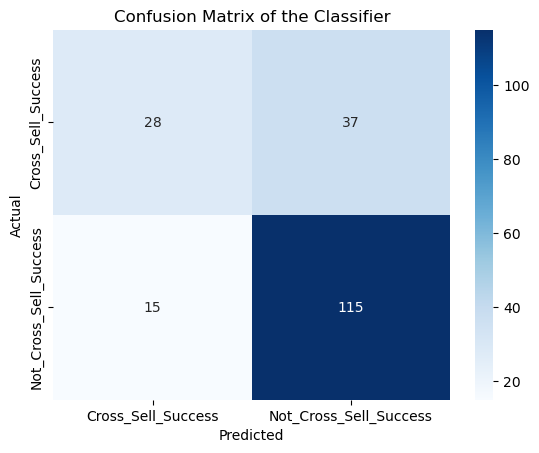

In [37]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = full_tree_test_pred,
          labels = ['Cross_Sell_Success', 'Not_Cross_Sell_Success'])

In [38]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = full_tree_test_pred).round(decimals = 4))


# saving AUC score for future use
dtc_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = full_tree_test_pred).round(decimals = 4)

0.6577


In [39]:
# zipping each feature name to its feature importance score
decisiontreeclassifier_model_values = zip(Cross_Sell_Success_Data[category_dict['logit_sig_2']].columns,
                          full_tree_fit.feature_importances_.round(decimals = 2))


# setting up a placeholder list to store model features
decisiontreeclassifier_model_lst = []

# printing out each feature-importance pair one by one
for val in decisiontreeclassifier_model_values:
    decisiontreeclassifier_model_lst.append(val)

# checking the results
for pair in decisiontreeclassifier_model_lst:
    print(pair)


('revenue', 0.13)
('unique_meals_ordered', 0.05)
('avg_time_per_site_visit', 0.05)
('cancellations_after_noon', 0.22)
('pc_logins', 0.0)
('mobile_logins', 0.04)
('domain_personal', 0.29)
('domain_professional', 0.22)
('low_rating', 0.0)


In [40]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
rfc           {rfull_tree_auc_score}        {rtc_tn, rtc_fp, rtc_fn, rtc_tp}
dtc           {full_tree_auc_score}        {dtc_tn, dtc_fp, dtc_fn, dtc_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'        : ['rfc', 'dtc'],
           
    'AUC Score'         : [rfull_tree_auc_score, full_tree_auc_score],
    
    'Training Accuracy' : [rfull_tree_train_score, full_tree_train_score],
           
    'Testing Accuracy'  : [rfull_tree_test_score, full_tree_test_score],

    'Confusion Matrix'  : [(rtc_tn, rtc_fp, rtc_fn, rtc_tp),
                           (dtc_tn, dtc_fp, dtc_fn, dtc_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
rfc           0.5923        (17, 48, 10, 120)
dtc           0.6577        (28, 37, 15, 115)



In [41]:
print(model_performance)

  Model Name  AUC Score  Training Accuracy  Testing Accuracy  \
0        rfc     0.5923             0.7379            0.7026   
1        dtc     0.6577             0.7327            0.7333   

    Confusion Matrix  
0  (17, 48, 10, 120)  
1  (28, 37, 15, 115)  
